In [9]:
import time

from model import Model, Optimizer, WavenetData

from IPython.display import Audio
from IPython.core.debugger import Tracer
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display
import torch
import numpy as np
#%matplotlib inline
%matplotlib notebook

In [10]:
model = Model(num_time_samples=10000, 
              num_blocks=2, 
              num_layers=12, 
              num_hidden=128, 
              num_classes=256)
print('model: ', model)
print('scope: ', model.scope)

current scope:  1
current scope:  3
current scope:  7
current scope:  15
current scope:  31
current scope:  63
current scope:  127
current scope:  255
current scope:  511
current scope:  1023
current scope:  2047
current scope:  4095
current scope:  4096
current scope:  4098
current scope:  4102
current scope:  4110
current scope:  4126
current scope:  4158
current scope:  4222
current scope:  4350
current scope:  4606
current scope:  5118
current scope:  6142
current scope:  8190
scope:  12286
model:  Model (
  (main): Sequential (
    (b0-l0.conv_dilation1): ConvDilated (
      (conv): Conv1d(1, 128, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l1.conv_dilation2): ConvDilated (
      (conv): Conv1d(128, 128, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l2.conv_dilation4): ConvDilated (
      (conv): Conv1d(128, 128, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l3.conv_dilation8): ConvDilated (
      (conv): Conv1d(128, 128, kernel_size=(2,), stride

<IPython.core.display.Javascript object>


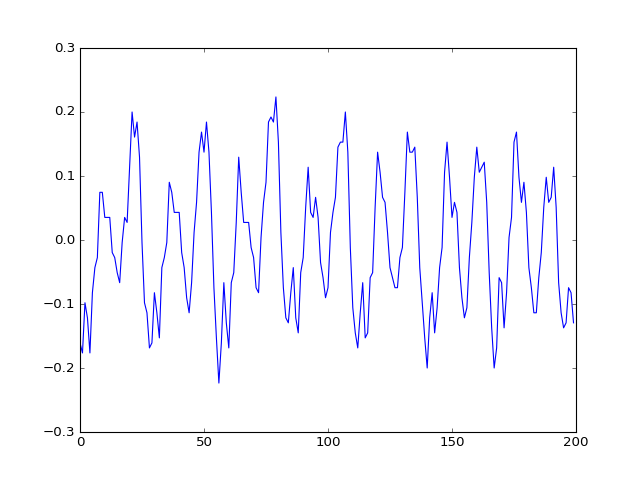

In [11]:
data = WavenetData('bach_11025.wav',
                   input_length=model.scope,
                   target_length=model.last_block_scope,
                   num_classes=model.num_classes)
start_tensor = data.get_minibatch([30000])[0].squeeze()
plt.ion()
plt.plot(start_tensor[-200:].numpy())
plt.ioff()

In [12]:
optimizer = Optimizer(model,
                      learning_rate=0.01,
                      stop_threshold=0.1,
                      avg_length=4)

<IPython.core.display.Javascript object>


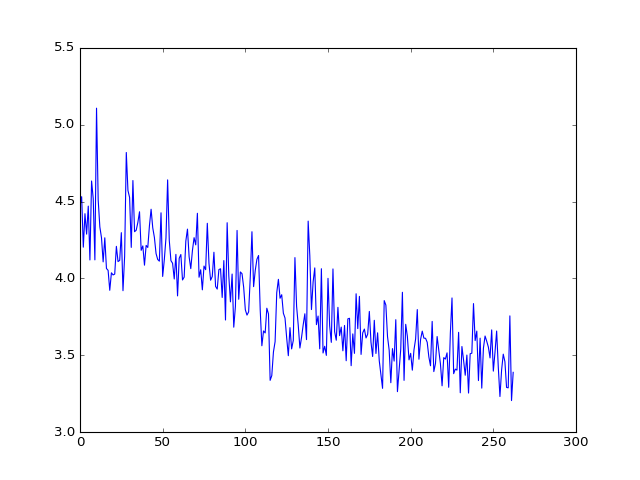

start training...


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

def hook(losses):
    ax.clear()
    ax.plot(losses)
    fig.canvas.draw()
    #print(losses[-1])
    
optimizer.hook = hook

#Tracer()()

print('start training...')
tic = time.time()
optimizer.train(data)
toc = time.time()
print('Training took {} seconds.'.format(toc-tic))

In [44]:
#torch.save(model, 'trained_model')

#start_tensor = torch.zeros((model.scope)) + 0
start_tensor = data.get_minibatch([12345])[0].squeeze()
print('generate...')
tic = time.time()
generated = model.generate(start_data=start_tensor, num_generate=200)
#generated = model.fast_generate(40000, first_sample=0.1)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

generate...
pad zero


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(generated.data[-200:].numpy())

In [ ]:
print('generate...')
tic = time.time()
[generated, support_generated] = model.fast_generate(200, first_samples=start_tensor)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

fig = plt.figure()
plt.plot(support_generated)

In [6]:
torch.save(model.state_dict(), "trained_state_bach_11025")
